In [22]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM,Dropout

Loading the dataset

In [2]:
dataset = pd.read_csv("D:\Datasets\covid-19\covid_19_india.csv")

Data Analysis

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [4]:
dataset.describe()

,Sno,Cured,Deaths,Confirmed
count,18110.000000,1.811000e+04,18110.000000,1.811000e+04
mean,9055.500000,2.786375e+05,4052.402264,3.010314e+05
std,5228.051023,6.148909e+05,10919.076411,6.561489e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,4528.250000,3.360250e+03,32.000000,4.376750e+03
50%,9055.500000,3.336400e+04,588.000000,3.977350e+04
75%,13582.750000,2.788698e+05,3643.750000,3.001498e+05
max,18110.000000,6.159676e+06,134201.000000,6.363442e+06


In [5]:
dataset.isna().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

Data Visualisation

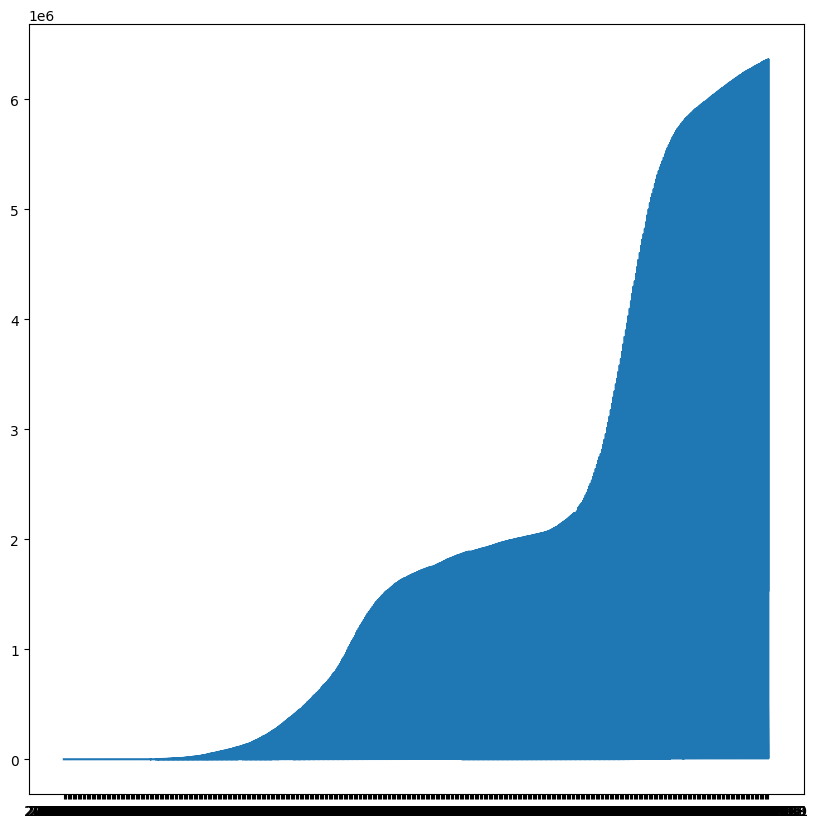

In [6]:
plt.figure(figsize=(10,10))
plt.plot(dataset['Date'], dataset['Confirmed'])
plt.show()

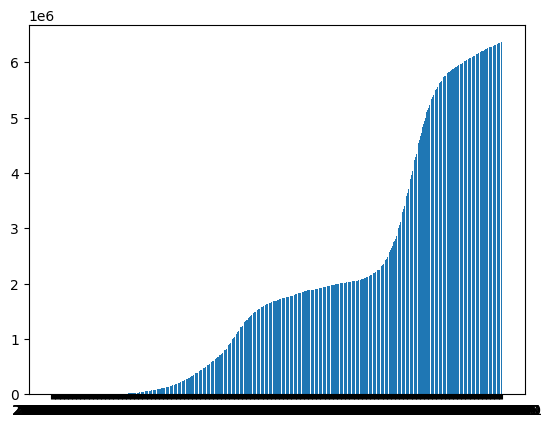

In [7]:
plt.bar(dataset['Date'], dataset['Confirmed'])
plt.show()

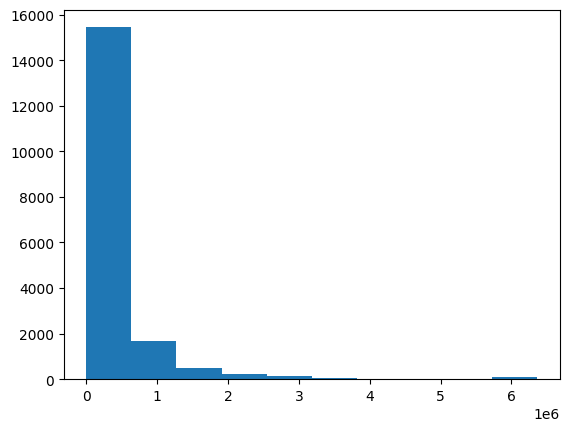

In [8]:
plt.hist(dataset['Confirmed'])
plt.show()

DataPreprocessing

In [9]:
# dataset.drop(columns=['Sno'], inplace=True)
# dataset.set_index('Date',inplace=True)
# dataset = dataset.iloc[2:,:]
# dataset.head()

In [10]:
dataset.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [11]:
timeseries_data = dataset[['Confirmed']]
timeseries_data

,Confirmed
0,1
1,1
2,2
3,3
4,3
...,...
18105,650353
18106,80660
18107,342462
18108,1708812


In [12]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(timeseries_data)

Creating Dataset for timeseries forecasting

In [13]:
def create_dataset(data,window):
    x = []
    y = []
    for i in range(window,len(data)):
        x.append(data[i-window:i])
        y.append(data[i])
    return np.asarray(x), np.asarray(y)

In [14]:
dataset_x, dataset_y = create_dataset(scaled_data,6)

In [15]:
for i in range(len(dataset_x)):
    print(dataset_x[i],dataset_y[i])

[[1.57147657e-07]
 [1.57147657e-07]
 [3.14295314e-07]
 [4.71442971e-07]
 [4.71442971e-07]
 [4.71442971e-07]] [4.71442971e-07]
[[1.57147657e-07]
 [3.14295314e-07]
 [4.71442971e-07]
 [4.71442971e-07]
 [4.71442971e-07]
 [4.71442971e-07]] [4.71442971e-07]
[[3.14295314e-07]
 [4.71442971e-07]
 [4.71442971e-07]
 [4.71442971e-07]
 [4.71442971e-07]
 [4.71442971e-07]] [4.71442971e-07]
[[4.71442971e-07]
 [4.71442971e-07]
 [4.71442971e-07]
 [4.71442971e-07]
 [4.71442971e-07]
 [4.71442971e-07]] [4.71442971e-07]
[[4.71442971e-07]
 [4.71442971e-07]
 [4.71442971e-07]
 [4.71442971e-07]
 [4.71442971e-07]
 [4.71442971e-07]] [4.71442971e-07]
[[4.71442971e-07]
 [4.71442971e-07]
 [4.71442971e-07]
 [4.71442971e-07]
 [4.71442971e-07]
 [4.71442971e-07]] [4.71442971e-07]
[[4.71442971e-07]
 [4.71442971e-07]
 [4.71442971e-07]
 [4.71442971e-07]
 [4.71442971e-07]
 [4.71442971e-07]] [4.71442971e-07]
[[4.71442971e-07]
 [4.71442971e-07]
 [4.71442971e-07]
 [4.71442971e-07]
 [4.71442971e-07]
 [4.71442971e-07]] [4.714429

Splitting the data set into train and test sets

In [16]:
x_train, x_test, y_train, y_test  = train_test_split(dataset_x, dataset_y, random_state=0, test_size=0.2)
x_train,x_valid, y_train,y_valid = train_test_split(x_train,y_train, random_state=0, test_size=0.2)

Creating an LSTM Model

In [17]:
model = Sequential()
model.add(LSTM(50,activation='relu',input_shape=(6,1), return_sequences=True))
model.add(Dropout(rate=0.5))
model.add(LSTM(60,activation='relu',return_sequences=False))
model.add(Dropout(rate=0.5))
model.add(Dense(100,activation='relu'))
model.add(Dense(1))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 6, 50)             10400     
                                                                 
 dropout (Dropout)           (None, 6, 50)             0         
                                                                 
 lstm_1 (LSTM)               (None, 60)                26640     
                                                                 
 dropout_1 (Dropout)         (None, 60)                0         
                                                                 
 dense (Dense)               (None, 100)               6100      
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 43,241
Trainable params: 43,241
Non-traina

In [19]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(x_train,y_train, batch_size=32, epochs=100, validation_data=(x_valid,y_valid),verbose=2)

Epoch 1/100
363/363 - 8s - loss: 0.0102 - mae: 0.0551 - val_loss: 0.0085 - val_mae: 0.0462 - 8s/epoch - 22ms/step
Epoch 2/100
363/363 - 3s - loss: 0.0096 - mae: 0.0536 - val_loss: 0.0077 - val_mae: 0.0515 - 3s/epoch - 10ms/step
Epoch 3/100
363/363 - 4s - loss: 0.0093 - mae: 0.0526 - val_loss: 0.0074 - val_mae: 0.0493 - 4s/epoch - 10ms/step
Epoch 4/100
363/363 - 4s - loss: 0.0087 - mae: 0.0519 - val_loss: 0.0067 - val_mae: 0.0511 - 4s/epoch - 10ms/step
Epoch 5/100
363/363 - 4s - loss: 0.0069 - mae: 0.0479 - val_loss: 0.0053 - val_mae: 0.0531 - 4s/epoch - 10ms/step
Epoch 6/100
363/363 - 3s - loss: 0.0057 - mae: 0.0461 - val_loss: 0.0048 - val_mae: 0.0475 - 3s/epoch - 10ms/step
Epoch 7/100
363/363 - 3s - loss: 0.0051 - mae: 0.0441 - val_loss: 0.0046 - val_mae: 0.0438 - 3s/epoch - 10ms/step
Epoch 8/100
363/363 - 3s - loss: 0.0047 - mae: 0.0429 - val_loss: 0.0040 - val_mae: 0.0473 - 3s/epoch - 10ms/step
Epoch 9/100
363/363 - 3s - loss: 0.0045 - mae: 0.0422 - val_loss: 0.0049 - val_mae: 0.04

In [20]:
y_pred = model.predict(x_test)

114/114 [==============================] - 1s 2ms/step


In [21]:
print(y_pred)

[[0.02656846]
 [0.04430008]
 [0.02044861]
 ...
 [0.02192836]
 [0.24196336]
 [0.01918552]]


In [23]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.0007100799949628455
